<a href="https://colab.research.google.com/github/bhanuchaddha/The-Ai-Handbook/blob/main/4-AI-Agents/health_and_fitness_coach/Multi_Agent_Health_and_Fitness_Coach_with_Phidata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a Multi-Agent Health and Fitness Coach with Phidata

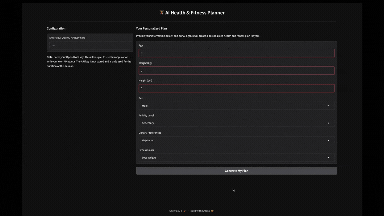



This notebook guides you through the creation of an interactive, personalized Health and Fitness Coach powered by a **multi-agent system** built using the `phidata` library. We'll leverage the capabilities of Large Language Models (LLMs) through OpenAI's API (abstracted by `phidata`) and create a user-friendly interface with Gradio.

### **Introduction: What We're Building**

In this project, we're developing a sophisticated AI-driven Health and Fitness Coach that provides tailored dietary and fitness plans. Unlike a single, monolithic AI, we'll be employing a **multi-agent system** where specialized AI agents collaborate to deliver a comprehensive solution.

Our system will consist of two primary agents:

1. **Dietary Expert Agent:** This agent will be responsible for generating personalized meal plans based on the user's dietary preferences, restrictions, and goals.
2. **Fitness Expert Agent:** This agent will focus on creating customized workout routines, including warm-ups, exercises, and cool-downs, tailored to the user's fitness level and objectives.

These agents will work together, drawing upon their specialized knowledge to provide a holistic health and fitness plan. The user will interact with the system through a Gradio interface, providing their information and receiving a combined plan generated by the collaborative efforts of the agents.

### **Benefits of Using an Agentic System**

Employing a multi-agent system for our Health and Fitness Coach offers several advantages:

1. **Specialization and Expertise:** Each agent can be designed as a specialist in a specific domain (diet or fitness). This allows for more focused expertise and higher-quality recommendations compared to a general-purpose AI.
2. **Modularity and Maintainability:** The system is modular, making it easier to update, improve, or debug individual agents without affecting the entire system.
3. **Scalability:** We can easily add more specialized agents in the future (e.g., a Nutrition Facts Agent, a Supplement Advisor Agent) to expand the system's capabilities.
4. **Reasoning and Collaboration:** Agents can be designed to interact and reason together, leading to more nuanced and comprehensive plans. For example, the Fitness Agent could potentially query the Dietary Agent to ensure the workout plan aligns with the recommended diet.
5. **Robustness:** If one agent encounters an issue, the others can potentially compensate, making the overall system more resilient.

### **Technology Stack**

Our Health and Fitness Coach will utilize the following technologies:

1. **Phidata:**
    *   **Purpose:** `phidata` is a Python library designed to simplify the development of AI applications, particularly those involving LLMs. It provides abstractions for creating and managing AI agents, handling interactions with LLMs, and building workflows.
    *   **Role:** We'll use `phidata`'s `Agent` class to create our Dietary and Fitness Expert agents. `phidata` will handle the underlying communication with OpenAI's API.
    *   **Why:** `phidata` streamlines the process of building agent-based systems, allowing us to focus on the agent's logic and behavior rather than low-level API interactions.

2. **OpenAI API (via Phidata):**
    *   **Purpose:** OpenAI provides powerful LLMs like GPT-3.5 and GPT-4, which can understand and generate human-quality text.
    *   **Role:** We'll use OpenAI's models as the "brains" of our agents. `phidata`'s `OpenAIChat` class will provide an interface to interact with the OpenAI API.
    *   **Why:** OpenAI's LLMs are state-of-the-art in natural language processing, enabling our agents to provide intelligent and contextually relevant recommendations.

3. **Gradio:**
    *   **Purpose:** Gradio is a Python library for creating user interfaces for machine learning models.
    *   **Role:** We'll use Gradio to build a simple and intuitive web interface for users to interact with our Health and Fitness Coach.
    *   **Why:** Gradio makes it easy to deploy our agent system as an interactive web application without needing extensive front-end development experience.

### **Implementation**

Let's dive into the code!

#### **Step 1: Install Necessary Libraries**

In [ ]:
!pip install phidata openai gradio

#### **Step 2: Import Libraries and Set Up API Key**

In [ ]:
import gradio as gr
from phi.agent import Agent
from phi.llm.openai import OpenAIChat
import os

# Function to create an agent with the given API key
def create_agent(api_key, name, role, instructions, model="gpt-3.5-turbo"):
    """Creates a phi.agent with an OpenAI LLM using the provided API key."""
    llm = OpenAIChat(api_key=api_key, model=model)
    return Agent(
        name=name,
        llm=llm,
        role=role,
        instructions=instructions,
    )

# Function to generate dietary plan
def generate_dietary_plan_with_agent(user_profile, dietary_agent):
    """Generates a dietary plan using a phi.agent."""
    prompt = f"""
    {user_profile}

    Suggest a detailed meal plan for the day, including breakfast, lunch, dinner, and snacks.
    Provide a brief explanation of why the plan is suited to the user's goals.
    Focus on clarity, coherence, and quality of the recommendations.
    """
    response = dietary_agent.run(prompt)
    return response.content

# Function to generate fitness plan
def generate_fitness_plan_with_agent(user_profile, fitness_agent):
    """Generates a fitness plan using a phi.agent."""
    prompt = f"""
    {user_profile}

    Provide exercises tailored to the user's goals.
    Include warm-up, main workout, and cool-down exercises.
    Explain the benefits of each recommended exercise.
    Ensure the plan is actionable and detailed.
    """
    response = fitness_agent.run(prompt)
    return response.content

# Main function to generate health and fitness plans
def generate_health_and_fitness_plan(
    openai_api_key, age, weight, height, sex, activity_level, dietary_preferences, fitness_goals
):
    """Generates a combined dietary and fitness plan using phi.agent."""
    if not openai_api_key:
        return "Error: Please enter your OpenAI API key in the configuration section.", ""

    user_profile = f"""
    Age: {age}
    Weight: {weight}kg
    Height: {height}cm
    Sex: {sex}
    Activity Level: {activity_level}
    Dietary Preferences: {dietary_preferences}
    Fitness Goals: {fitness_goals}
    """



    os.environ['OPENAI_API_KEY']=openai_api_key

    # Create the agents using the provided API key
    dietary_agent = create_agent(
        openai_api_key,
        name="Dietary Expert",
        role="Provides personalized dietary recommendations",
        instructions=[
            "Consider the user's input, including dietary restrictions and preferences.",
            "Suggest a detailed meal plan for the day, including breakfast, lunch, dinner, and snacks.",
            "Provide a brief explanation of why the plan is suited to the user's goals.",
            "Focus on clarity, coherence, and quality of the recommendations.",
        ],
        model="gpt-3.5-turbo"
    )

    fitness_agent = create_agent(
        openai_api_key,
        name="Fitness Expert",
        role="Provides personalized fitness recommendations",
        instructions=[
            "Provide exercises tailored to the user's goals.",
            "Include warm-up, main workout, and cool-down exercises.",
            "Explain the benefits of each recommended exercise.",
            "Ensure the plan is actionable and detailed.",
        ],
        model="gpt-3.5-turbo"
    )

    try:
        dietary_plan = generate_dietary_plan_with_agent(user_profile, dietary_agent)
        fitness_plan = generate_fitness_plan_with_agent(user_profile, fitness_agent)
        return f"## Dietary Plan\n\n{dietary_plan}", f"## Fitness Plan\n\n{fitness_plan}"  # Add headings here
    except Exception as e:
        return f"An error occurred: {str(e)}", ""

# --- Gradio Interface ---
with gr.Blocks(
    title="AI Health & Fitness Planner",
    css="""
        .main-heading {
            text-align: center;
            font-size: 32px;
            font-weight: bold;
        }
        .hr {
            margin-top: 0px;
            margin-bottom: 20px;
        }
    """
) as iface:
    gr.Markdown("<center><h1>🏋️‍♂️ AI Health & Fitness Planner</h1></center>", elem_classes="main-heading")
    gr.HTML("<hr class='hr'>")  # Add a horizontal line with the 'hr' class


    with gr.Row():
        with gr.Column(scale=3):
            gr.Markdown("### Configuration")
            openai_api_key_input = gr.Textbox(
                label="Enter your OpenAI API Key here",
                type="password",
                placeholder="sk-...",
            )
            gr.Markdown(
                "**Note:** Enter your OpenAI API key. This allows you to use this application with your own API quota. The API key is not stored and is only used for the duration of this session."
            )

        with gr.Column(scale=7):
            gr.Markdown("### Your Personalized Plan")
            gr.Markdown(
                "Provide your information below, and our AI agents will create a personalized health and fitness plan for you."
            )

            # Input fields (now visible by default)
            age_input = gr.Number(label="Age", minimum=10, maximum=100, step=1)
            weight_input = gr.Number(label="Weight (kg)", minimum=20.0, maximum=300.0, step=0.1)
            height_input = gr.Number(label="Height (cm)", minimum=100.0, maximum=250.0, step=0.1)
            sex_input = gr.Dropdown(label="Sex", choices=["Male", "Female", "Other"])
            activity_level_input = gr.Dropdown(
                label="Activity Level",
                choices=["Sedentary", "Lightly Active", "Moderately Active", "Very Active", "Extremely Active"],
            )
            dietary_preferences_input = gr.Dropdown(
                label="Dietary Preferences",
                choices=["Vegetarian", "Keto", "Gluten Free", "Low Carb", "Dairy Free"],
            )
            fitness_goals_input = gr.Dropdown(
                label="Fitness Goals",
                choices=["Lose Weight", "Gain Muscle", "Endurance", "Stay Fit", "Strength Training"],
            )

            generate_button = gr.Button("Generate My Plan")

            # Output fields
            dietary_plan_output = gr.Markdown(label="Dietary Plan")
            fitness_plan_output = gr.Markdown(label="Fitness Plan")

    # Connect the button to the main function and inputs/outputs
    generate_button.click(
        fn=generate_health_and_fitness_plan,
        inputs=[
            openai_api_key_input,
            age_input,
            weight_input,
            height_input,
            sex_input,
            activity_level_input,
            dietary_preferences_input,
            fitness_goals_input
        ],
        outputs=[dietary_plan_output, fitness_plan_output]
    )

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0d557728a8e1343072.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 🏋️‍♂️ AI Health & Fitness Planner: How to Use

This AI-powered application generates personalized dietary and fitness plans tailored to your individual needs and goals. Here's a step-by-step guide on how to use it:

## 1. Configuration

### 1.1 Enter Your OpenAI API Key

*   **Find the "Configuration" section** on the left side of the application.
*   **Enter your OpenAI API key** in the textbox labeled "Enter your OpenAI API Key here".
    *   **Note:** You'll need an OpenAI account and an API key to use this application. You can get an API key from the OpenAI website ([https://platform.openai.com/](https://platform.openai.com/)).
    *   **Important:** Your API key is used only for this session and is not stored. It allows you to use the application with your own API quota.

## 2. Your Personalized Plan

### 2.1 Provide Your Information

*   **Find the "Your Personalized Plan" section** on the right side of the application.
*   **Fill in the following details:**
    *   **Age:** Enter your age (between 10 and 100).
    *   **Weight:** Enter your weight in kilograms.
    *   **Height:** Enter your height in centimeters.
    *   **Sex:** Select your sex from the dropdown menu (Male, Female, Other).
    *   **Activity Level:** Choose your typical activity level from the dropdown menu (Sedentary, Lightly Active, Moderately Active, Very Active, Extremely Active).
    *   **Dietary Preferences:** Select your dietary preferences from the dropdown menu (Vegetarian, Keto, Gluten Free, Low Carb, Dairy Free).
    *   **Fitness Goals:** Choose your fitness goals from the dropdown menu (Lose Weight, Gain Muscle, Endurance, Stay Fit, Strength Training).

### 2.2 Generate Your Plan

*   **Click the "Generate My Plan" button.**
*   **Wait for the loading message:** You'll see a message saying "⏳ Generating your personalized plans... Please wait." This indicates that the AI agents are working on creating your plans.

### 2.3 View Your Plans

*   **Dietary Plan:** Once generated, your personalized dietary plan will appear in the "Dietary Plan" section. It will include a detailed meal plan (breakfast, lunch, dinner, snacks) and an explanation of why the plan is suitable for you.
*   **Fitness Plan:** Your personalized fitness plan will appear in the "Fitness Plan" section. It will include warm-up exercises, main workout routines, cool-down exercises, and explanations of the benefits of each exercise.


#### Enjoy your personalized health and fitness journey!
